In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bh_molecule.instruments.vis133m import Vis133M
from bh_molecule.dataio import load_v00_wavelengths
from bh_molecule.physics import BHModel

In [2]:
import bh_molecule.fit as bhfit

In [3]:
FITS = './133mVis_169626.fits'
wavecal_csv = './133mVis_wavcal.csv'
s26 = Vis133M(FITS,wavecal_csv)
s26.set_scale(0.0001837)
s26.set_dark(frame=49, channel=43)
s26.set_time_linspace(0, 10)
#s26.plot_band_map((432.5,433.85))

In [4]:
v00 = load_v00_wavelengths()
model = BHModel(v00)
x = np.linspace(432.8, 434.2, 4000)  # nm
y = model.full_fit_model(x, C=5.0, T_rot=3500, dx=0.0, w_inst=0.02, base=0.0, I_R7=0.04, I_R8=0.03)

In [5]:
res = bhfit.fit_single_channel_frame(s26, model, frame=38, channel=30, nm_window=(433.05, 433.90), return_fit=True)
display(res["summary"])

,Parameter,Formatted
0,C,0.27027 ± 0.0022
1,T_rot,3600 ± 100 K
2,dx,0.000600 ± 7.5e-05 nm
3,w_inst,0.024667 ± 2.0e-04 nm
4,base,0.087699 ± 2.1e-04
5,I_R7,0.000216 ± 3.0e-05
6,I_R8,0.000274 ± 3.0e-05


<Axes: xlabel='wavelength [nm]', ylabel='intensity [arb]'>

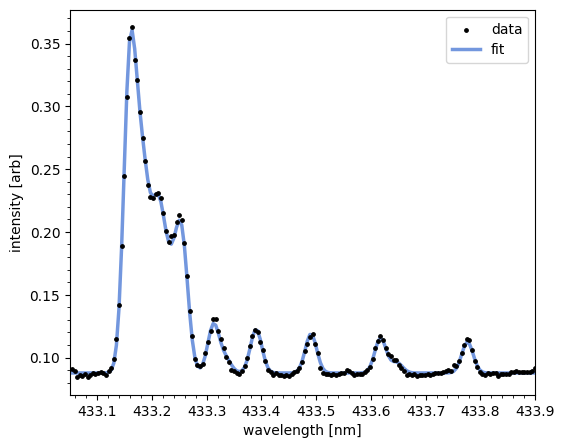

In [6]:
bhfit.plot_fit(res)

In [7]:
df, curves = bhfit.batch_fit(s26, model, frames=[38,39],channels=[28,29,30], return_curves=True)

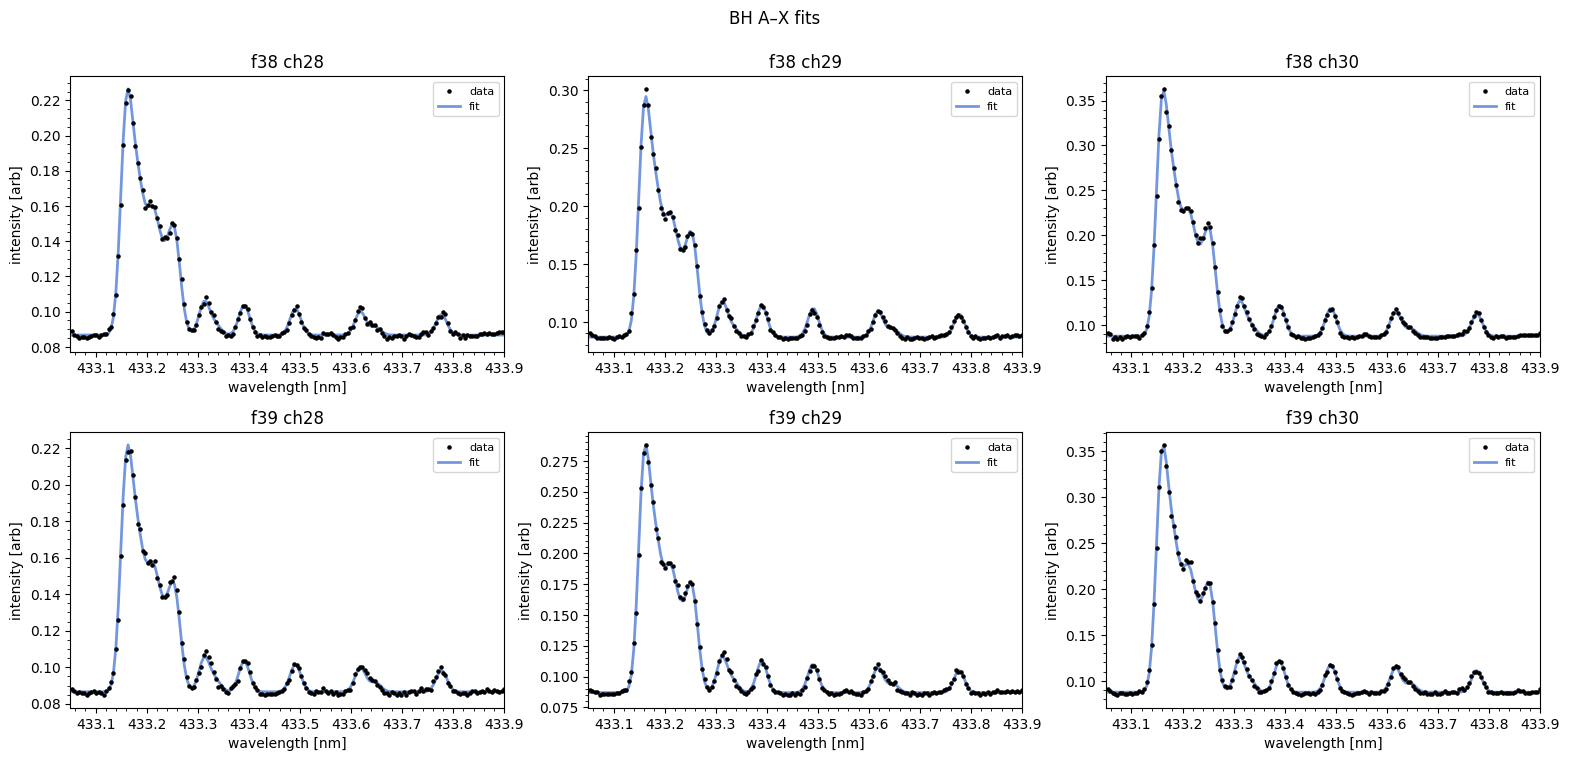

In [8]:
fig, axes = bhfit.plot_batch_grid(curves, suptitle="BH A–X fits")

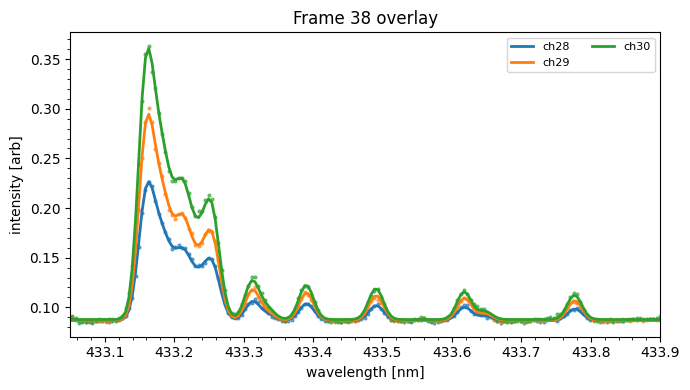

In [9]:
fig, ax = bhfit.plot_frame_overlay(curves, frame=38, channels=[28,29,30], title="Frame 38 overlay")